<a href="https://colab.research.google.com/github/AriqF1/dataMining/blob/main/produksiPadi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

df = pd.read_excel('produksiPadi.xlsx')

print(df.head())

   Tahun  Produksi Padi(Ton)
0   1970          18693649.0
1   1971          20483687.0
2   1972          19393933.0
3   1973          21490578.0
4   1974          22476073.0


In [8]:
# kolom lagging 1 tahun
df['Produksi_Lag_1'] = df['Produksi Padi(Ton)'].shift(1)

# kolom lagging 2 tahun
df['Produksi_Lag_2'] = df['Produksi Padi(Ton)'].shift(2)

df.fillna(0, inplace=True) # Mengisi nilai Nan dengan angka 0
print(df)


    Tahun  Produksi Padi(Ton)  Produksi_Lag_1  Produksi_Lag_2
0    1970         18693649.00            0.00            0.00
1    1971         20483687.00     18693649.00            0.00
2    1972         19393933.00     20483687.00     18693649.00
3    1973         21490578.00     19393933.00     20483687.00
4    1974         22476073.00     21490578.00     19393933.00
5    1975         22339455.00     22476073.00     21490578.00
6    1976         23300939.00     22339455.00     22476073.00
7    1977         23347132.00     23300939.00     22339455.00
8    1978         25771570.00     23347132.00     23300939.00
9    1979         26282663.00     25771570.00     23347132.00
10   1980         29651905.00     26282663.00     25771570.00
11   1981         32774176.00     29651905.00     26282663.00
12   1982         33583677.00     32774176.00     29651905.00
13   1983         35303106.00     33583677.00     32774176.00
14   1984         38136446.00     35303106.00     33583677.00
15   198

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Membaca data dari file Excel
file_path = 'produksiPadi.xlsx'  # Ganti dengan path file Anda
df = pd.read_excel(file_path)

# Contoh data (pastikan ada kolom 'Tahun' dan 'Produksi')
print(df.head())


   Tahun  Produksi Padi(Ton)
0   1970          18693649.0
1   1971          20483687.0
2   1972          19393933.0
3   1973          21490578.0
4   1974          22476073.0


In [10]:
# Memisahkan fitur (X) dan target (y)
X = df[['Tahun']]
y = df['Produksi Padi(Ton)']

# Membagi data menjadi data latih (70%) dan data uji (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [11]:
# Inisialisasi model regresi linear
model = LinearRegression()

# Melatih model
model.fit(X_train, y_train)

# Tampilan koefisien dan intercept model
print("Koefisien (Slope):", model.coef_[0])
print("Intercept:", model.intercept_)


Koefisien (Slope): 919791.223012648
Intercept: -1788935664.2799673


In [12]:
# Prediksi pada data uji
y_pred = model.predict(X_test)

# Tampilan hasil prediksi
print("Hasil Prediksi:\n", y_pred)
print("Data Aktual:\n", y_test.values)


Hasil Prediksi:
 [40529078.2921896  60764485.19846797 66283232.53654385 34090539.73110104
 62604067.64449334 27652001.17001271 38689495.84616446 69042606.20558167
 25812418.72398734 52486364.19135404 35010330.95411372 30411374.83905053
 46967616.85327816 28571792.39302516 54325946.63737941 26732209.94700003]
Data Aktual:
 [44725582.   65756904.   81148617.   33583677.   71279709.   22339455.
 40078195.   54649202.24 21490578.   51489694.   35303106.   25771570.
 51101506.   23300939.   54088468.   22476073.  ]


In [13]:
# Menghitung MSE
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 42542944649817.42


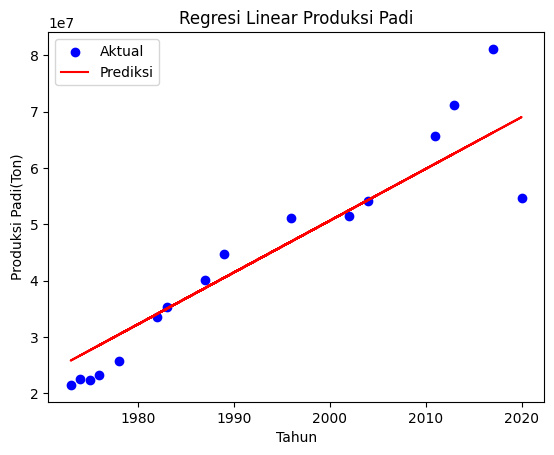

In [14]:
import matplotlib.pyplot as plt

# Plot data aktual dan prediksi
plt.scatter(X_test, y_test, color='blue', label='Aktual')
plt.plot(X_test, y_pred, color='red', label='Prediksi')
plt.xlabel('Tahun')
plt.ylabel('Produksi Padi(Ton)')
plt.title('Regresi Linear Produksi Padi')
plt.legend()
plt.show()


In [16]:
# Tahun yang ingin diprediksi
tahun_prediksi = pd.DataFrame([[2023], [2024]], columns=['Tahun'])

# Melakukan prediksi untuk tahun 2023 dan 2024
prediksi_produksi = model.predict(tahun_prediksi)

# hasil prediksi
print("Prediksi Produksi Padi untuk Tahun 2023:", prediksi_produksi[0])
print("Prediksi Produksi Padi untuk Tahun 2024:", prediksi_produksi[1])


Prediksi Produksi Padi untuk Tahun 2023: 71801979.87461972
Prediksi Produksi Padi untuk Tahun 2024: 72721771.09763241
